# Numerical Integration, Gaussian Quadrature, Numerical Approach to ODEs
## Oct. 2019

## 1a)
The code below numerically evaluates the integral $I_A = \int_{0}^{\frac{\pi}{3}} f(x) dx = \frac{8\pi}{9}$ where $f(x) = \frac{1}{\frac{5}{4} - cos(x)}$ using the composite trapezlid rule with $n$ intervals of equal size $h$ for $n = 1,2,...,50$. It then produces a log-log plot of the absoute error as a function of $h$, along with the composite trapezoid error bound $E(h) = \frac{h^2\pi}{36}||f''||_\infty$. 

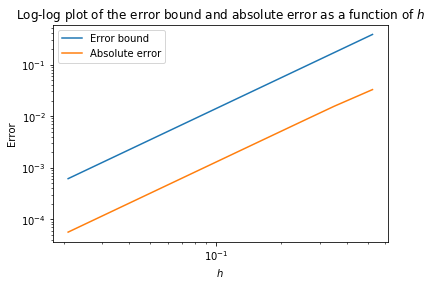

In [243]:
import numpy as np
import matplotlib.pyplot as plt


#Numerically evaluate the integral using the composite trapezoid rule
def f(x):
    return 1/(1.25 - np.cos(x))

I_a = (8 * np.pi) / 9
error_list = []
h_list = []

for n in range(1, 51):
    h = ((np.pi / 3) - 0) / n
    h_list.append(h)
    Q = 0
    for i in range(1, n+1):
        Q += 0.5 * h * (f(h * i - h) + f(h * i))
    error_list.append(abs(I_a - Q))

E_bound_list = []

def fprimeprime(x):
    fpp = (2*np.sin(x)**2) / (((5/4) - np.cos(x))**3) - (np.cos(x)) / (((5/4) - np.cos(x))**2)
    return fpp

xs = np.linspace(0, (np.pi/3), 100)
fpp_infnorm = np.linalg.norm(fprimeprime(xs), np.inf)

for h_item in h_list:
    E_bound = abs((((h_item**2)*np.pi) / 36) * fpp_infnorm)
    E_bound_list.append(E_bound)

    
# Log-log plot of the absolute error and error bound as a function of h


plt.loglog(h_list[1:50], E_bound_list[1:50], label='Error bound')
plt.loglog(h_list[1:50], error_list[1:50], label='Absolute error')
plt.xlabel("$h$")
plt.ylabel("Error")
plt.title("Log-log plot of the error bound and absolute error as a function of $h$")
plt.legend()
plt.show()

Thus, we can see that the numerically computed results are indeed smaller than the bound. 

## 1b)

The code below numerically evaluates the integral $I_B = \int_{0}^{2\pi} f(x) dx = \frac{8\pi}{3}$ where $f(x) = \frac{1}{\frac{5}{4} - cos(x)}$ using the composite trapezlid rule with $n$ intervals of equal size $h$ for $n = 1,2,...,50$. It then produces a log-log plot of the absoute error as a function of $h$.

The plot below compares our absolute error to two cases of h**m:


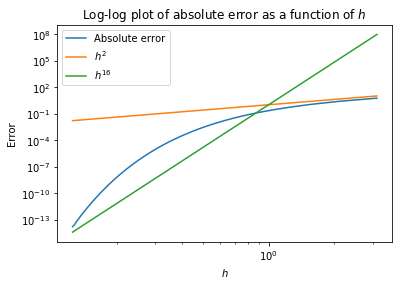

In [248]:
def f(x):
    return 1/(1.25 - np.cos(x))

I_b = (8 * np.pi) / 3
error_list = []
h_list = []

for n in range(1, 51):
    h = ((2*np.pi) - 0) / n
    h_list.append(h)
    Q = 0
    for i in range(1, n+1):
        Q += 0.5 * h * (f(h * i - h) + f(h * i))
    error_list.append(abs(I_b - Q))


h_list_power = []
for h_item in h_list:
    h_list_power.append(h_item**2)

    
h_list_power2 = []
for h_item in h_list:
    h_list_power2.append(h_item**16)
    
print("The plot below compares our absolute error to two cases of h**m:")
plt.loglog(h_list[1:50], error_list[1:50], label='Absolute error')
plt.loglog(h_list[1:50], h_list_power[1:50], label='$h^2$')
plt.loglog(h_list[1:50], h_list_power2[1:50], label='$h^{16}$')
plt.xlabel("$h$")
plt.ylabel("Error")
plt.title("Log-log plot of absolute error as a function of $h$")
plt.legend()
plt.show()



So we can see that the graph of $h^m$ will always be a straight line on our log-log plot. Clearly, this is not what the absolute error graph does. Thus, we conclude the absolute error does $\bf{not}$ scale like $h^m$ for some $m$.

And the way that our absolute error graph scales in comparison to the $h^m$ lines is interesting. It indicates that as $h$ gets small, the error between our approximation and the true value nosedives. So the composite trapezoid rule performs exceedingly well on this interval!

## 2a)

We know that the quadrature points are given by te roots of the cubic Legendre polynomial $P_3(x) = \frac{1}{2}(5x^3 - 3x)$. Finding these gives us the values:

$x_0 = -\sqrt{\frac{3}{5}}$

$x_1 = 0$

$x_2 = \sqrt{\frac{3}{5}}$

To find the weights to apply to the function evaluated at each of the three points above on the interval $[-1,1]$, we will perform the integrals $w_k = \int_{-1}^{1} L_k(x) dx$ for each of our three points, where $L_k$ is the Lagrange polynomial associated with $x_k$. The general form of Lagrange polynomials is:


$L_j(x) = \prod_{0 \leq m \leq k; m \neq j}^{} \frac{x-x_m}{x_j - x_m}$

So for $L_0(x) = \frac{(x-x_1)(x-x_2)}{(x_0 - x_1)(x_0 - x_2)}$, plugging in the roots $x_0$, $x_1$, and $x_2$ we found above, we have:

$L_0(x) = \frac{5x^2 - 5x\sqrt{\frac{3}{5}}}{6}$

Using a similar process for $L_1(x) = \frac{(x-x_0)(x-x_2)}{(x_1 - x_0)(x_1 - x_2)}$ and $L_2(x) = \frac{(x-x_0)(x-x_1)}{(x_2 - x_0)(x_2 - x_1)}$, we find that:

$L_1(x) = -\frac{5}{3}x^2 + 1 $

$L_2(x) = \frac{5x^2 + 5x\sqrt{\frac{3}{5}}}{6}$

So now we can evaluate the integrals $w_k = \int_{-1}^{1} L_k(x) dx$ for each of our three points.

For point 0:

$w_0 = \int_{-1}^{1} L_0(x) dx = \int_{-1}^{1} \frac{5x^2 - 5x\sqrt{\frac{3}{5}}}{6} dx = \frac{1}{6} \int_{-1}^{1}(5x^2 - 5x\sqrt{\frac{3}{5}}) dx$ 

$= \frac{5}{6} \int_{-1}^{1} x^2 dx - \frac{5}{6}\sqrt{\frac{3}{5}} \int_{-1}^{1}xdx$

$ = \frac{5}{6}\left[\frac{1}{3}x^3\right]_{-1}^{1} - \frac{5}{6}\sqrt{\frac{3}{5}}\left[\frac{1}{2}x^2\right]_{-1}^1 = \frac{5}{6}(\frac{1}{3} - (-\frac{1}{3})) - \frac{5}{6}\sqrt{\frac{3}{5}}\frac{1}{2}(1-1)$

$ = \frac{5}{6}(\frac{2}{3}) = \frac{5}{9}$

So we have:

$w_0 = \frac{5}{9}$

For point 1:

$w_1 = \int_{-1}^{1} L_1(x) dx = \int_{-1}^{1} (-\frac{5}{3}x^2 + 1) dx$

$ = -\frac{5}{3}\int_{-1}^{1}x^2dx + \int_{-1}^{1}dx$

$ = -\frac{5}{3}\left[\frac{1}{3}x^3\right]_{-1}^{1} + \left[x\right]_{-1}^1 = -\frac{5}{3}(\frac{2}{3}) + 2$

So we have:

$w_1 = \frac{8}{9}$

For point 2:

$w_0 = \int_{-1}^{1} L_0(x) dx = \int_{-1}^{1} \frac{5x^2 + 5x\sqrt{\frac{3}{5}}}{6} dx = \frac{5}{6} \int_{-1}^{1} x^2 dx + \frac{5}{6}\sqrt{\frac{3}{5}} \int_{-1}^{1}xdx$

$ = \frac{5}{6}\left[\frac{1}{3}x^3\right]_{-1}^{1} + \frac{5}{6}\sqrt{\frac{3}{5}}\left[\frac{1}{2}x^2\right]_{-1}^1$ 

$= \frac{5}{6}(\frac{1}{3} - (-\frac{1}{3})) + \frac{5}{6}\sqrt{\frac{3}{5}}\frac{1}{2}(1-1)$

$ = \frac{5}{6}(\frac{2}{3}) = \frac{5}{9}$

So we have:

$w_2 = \frac{5}{9}$

Thus, the integral of a function $f(x)$ can be approximated by the following representation of the 3-point Gauss quadrature rule on the interval $[-1,1]$:

$\frac{5}{9}f(x_0) + \frac{8}{9}f(x_1) + \frac{5}{9}f(x_2)$, which, given our roots, becomes:

$\frac{5}{9}f(-\sqrt{\frac{3}{5}}) + \frac{8}{9}f(0) + \frac{5}{9}f(\sqrt{\frac{3}{5}})$

We can show the quadrature rule integrates all polynomials up to the expected degree exactly.

For a 3-point quadrature rule, we expect it would work up to degree $2n - 1 = 2(3) - 1 = 5$, so we construct the general polynomial:

$P(x) = c_0 + c_1x + c_2x^2 + c_3x^3 +c_4x^4 + c_5x^5$


We'll first find the form of the exact value of the integral over the given interval:

$\int_{-1}^1 P(x) dx = \left[ c_0x + \frac{1}{2}c_1x^2 + \frac{1}{3}c_2x^3 + \frac{1}{4}c_3x^4 + \frac{1}{5}c_4x^5 + \frac{1}{6}c_5x^6\right]_{-1}^{1}$

The terms with even exponents will cancel given the $[-1,1]$ interval, leaving the result:

$2c_0 + \frac{2}{3}c_2 + \frac{2}{5}c_4$

Now, we'll evalute the integral using our 3-point rule:

$\int_{-1}^{1} P(x) dx = w_0P(x_0) + w_1P(x_1) + w_2P(x_2)$

$ = w_0(c_0 + c_1x_0 + c_2x_0^2 + c_3x_0^3 +c_4x_0^4 + c_5x_0^5) + w_1(c_0 + c_1x_1 + c_2x_1^2 + c_3x_1^3 +c_4x_1^4 + c_5x_1^5) + w_2(c_0 + c_1x_2 + c_2x_2^2 + c_3x_2^3 +c_4x_2^4 + c_5x_2^5)$

Since $x_1 = 0$:

$ = c_0(w_0 + w_1 + w_2) + c_1(w_0x_0 + w_2x_2) + c_2(w_0x_0^2 + w_2x_2^2) + c_3(w_0x_0^3 + w_2x_2^3) + c_4(w_0x_0^4 + w_2x_2^4) + c_5(w_0x_0^5 + w_2x_2^5)$

We can see that since $w_0 = w_2$, but $x_0 = -x_2$, any case $(w_0x_0^t + w_2x_2^t)$ where $t$ is odd will equal 0.So we have:

$ = c_0(\frac{5}{9} + \frac{8}{9} + \frac{5}{9}) + c_2(\frac{5}{9}(-\sqrt{\frac{3}{5}})^2 + \frac{5}{9}(\sqrt{\frac{3}{5}})^2) + c_4(\frac{5}{9}(-\sqrt{\frac{3}{5}})^4 + \frac{5}{9}(\sqrt{\frac{3}{5}})^4)$

This simplifies to $2c_0 + \frac{2}{3}c_2 + \frac{2}{5}c_4$, which is the same as the solution we found above! 

So we can see that this quadrature rule integrates all polynomials up to the expected degree exactly.

## 2b)

See below for the code for the function to implement the adaptive integration scheme. Note that in order to allow the interval to shift from what we did above, we think of integrating $I_{a,b} = \int_a^b f(z) dz$, where we let $z = \frac{a+b}{2} + \frac{b-a}{2}x$.

So the integral becomes $I_{a,b} = \frac{b-a}{2}\int_{-1}^1 f(\frac{a+b}{2} + \frac{b-a}{2}x) dz$.

Applying our quadrature rule, our estimate for $I_{a,b}$ takes the form:

$I_{a,b} = \frac{b-a}{2} \left[w_0f(\frac{a+b}{2} + \frac{b-a}{2}x_0) + w_1f(\frac{a+b}{2} + \frac{b-a}{2}x_1) + w_2f(\frac{a+b}{2} + \frac{b-a}{2}x_2)\right] $

In [282]:
#From the reasoning above, we have:
def I(func, a, b):
    return ((b-a)/2) * ((5/9)*func(((a+b)/2)+((b-a)/2)*(-np.sqrt(3/5))) + (8/9)*func(((a+b)/2)+((b-a)/2)*0) + (5/9)*func(((a+b)/2)+((b-a)/2)*np.sqrt(3/5)))

#Our 3-pt. Gauss quadrature rule for an adaptive integration estimate.
def threepoint_gauss_quad(func, T, start, end):
    
    Iab = I(func, start, end)
    
    c = (start+end)/2
    
    Iac = I(func, start, c)
    Icb = I(func, c, end)
    
    Iab_hat = Iac + Icb
    Eab = abs(Iab - Iab_hat)
    l = abs(end-start)
    
    if Eab < T*l:
        #Returning this format allows us to see our total value of the integral
        #in the 0th position, our total error in the 1st position, and the total 
        #number of intervals in the 2nd position.
        return np.array([Iab, Eab, 1])
    else:
        return threepoint_gauss_quad(func, T, start, c) + threepoint_gauss_quad(func, T, c, end)
    

We now apply it to the integral $\int_{-1}^{\frac{9}{4}} (x^m - x^2 +1)dx$ using $T = 10 ^{-6}$ for $m= 4,5,6,7,8$. The results for each case (integral value, total estimated error, and total number of intervals) are output by the code below.

In [283]:

for m in range(4, 9):
    def f(x):
        return x**m - x**2 +1
    result = threepoint_gauss_quad(f, T=10**(-6), start=-1, end=9/4)
    print("For m = " + str(m) + ":")
    print("The value of the integral is", result[0])
    print("The total estimated error is", result[1])
    print("The number of intervals used is", int(result[2]))
    print("\n")

For m = 4:
The value of the integral is 10.852799479166665
The total estimated error is 1.7763568394002505e-15
The number of intervals used is 1


For m = 5:
The value of the integral is 20.577514648437496
The total estimated error is 7.105427357601002e-15
The number of intervals used is 1


For m = 6:
The value of the integral is 40.96682876426836
The total estimated error is 8.025390488275441e-08
The number of intervals used is 16


For m = 7:
The value of the integral is 81.0998956861716
The total estimated error is 5.870134192065279e-07
The number of intervals used is 15


For m = 8:
The value of the integral is 163.44111091842885
The total estimated error is 7.379724338008042e-07
The number of intervals used is 20




## 2c) 

We now implement the adaptive integration routine using $T = 10 ^{-6}$ for the three integrals below:

$\int_{-1}^{1}|x|dx$

$\int_{-1}^{2}|x|dx$

$\int_{0}^{1}x^{\frac{3}{4}}sin(\frac{1}{x})dx$

The results for each are below. 

In [284]:
def g(x):
        return abs(x)
resulta = threepoint_gauss_quad(g, T=10**(-6), start=-1, end=1)
print("For the first integral:")
print("The value of the integral is", resulta[0])
print("The total estimated error is", resulta[1])
print("The number of intervals used is", int(resulta[2]))
print("\n")

def h(x):
        return abs(x)
resultb = threepoint_gauss_quad(h, T=10**(-6), start=-1, end=2)
print("For the second integral:")
print("The value of the integral is", resultb[0])
print("The total estimated error is", resultb[1])
print("The number of intervals used is", int(resultb[2]))
print("\n")

def j(x):
        return (x**(3/4))*np.sin(1/x)
resultc = threepoint_gauss_quad(j, T=10**(-6), start=0, end=1)
print("For the third integral:")
print("The value of the integral is", resultc[0])
print("The total estimated error is", resultc[1])
print("The number of intervals used is", int(resultc[2]))
print("\n")

For the first integral:
The value of the integral is 1.0
The total estimated error is 0.0
The number of intervals used is 2


For the second integral:
The value of the integral is 2.500000000096074
The total estimated error is 7.20552679410032e-11
The number of intervals used is 16


For the third integral:
The value of the integral is 0.4070268678505241
The total estimated error is 2.1294988755796596e-07
The number of intervals used is 194326




## 3a)

We use the fact that $g(x;\phi)$ can be numerically approximated to define the following functions:


In [411]:
    
def f0(x):
    return abs(x)

def f_k(x, phi, iterations):
    g_list = [f0(x)]
    
    #We set the first term on the first iteration, but not thereafter. 
    if iterations == 0:
        return g_list
    
    for i in range(1, iterations):
        fkminus1 = abs(g_list[-1] - phi**i)
        g_list.append(fkminus1)

    return g_list[-1]

def f_n_list(xs, phi, iterations):
    g_list = [f_k(i, phi, iterations) for i in xs]
    return g_list

def g_approximator(xs, phi):
    n = 1
    
    #Find the value where n pushes phi^n just barely over the 10^16 edge, since this
    #gives us the smallest value for n such that phi^n < 10^-16
    
    while phi**n > 10**-16:
        n += 1
        
    approximator = f_n_list(xs, phi, n)
        
    return approximator
    



The plot of $g(x;\frac{1}{3})$ on the interval $[-\frac{1}{2},\frac{1}{2}]$ is below. 

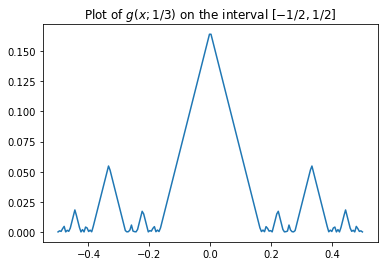

In [412]:
phi = 1/3
xs = np.linspace(-0.5, 0.5, 200)

plt.plot(xs, g_approximator(xs, phi))
plt.title("Plot of $g(x; 1/3)$ on the interval $[-1/2, 1/2]$")
plt.show()

## 3b)



To make a plot of $I(\phi)$, we first have to generalize our functions from question 2. 

In [423]:

def updated_I(func, phi, xvec, a, b):
    take0 = np.array(func(((a+b)/2)+((b-a)/2)*xvec, phi))
    take1 = np.array(func(((a+b)/2)+((b-a)/2)*xvec, phi))
    take2 = np.array(func(((a+b)/2)+((b-a)/2)*xvec, phi))
    return ((b-a)/2) * ((5/9)*take0[0] + (8/9)*take1[1] + (5/9)*take2[2])


def updated_gauss_quad(func, phi, xvec, T, start, end):
    
    Iab = updated_I(func, phi, xvec, start, end)
    
    c = (start+end)/2
    
    Iac = updated_I(func, phi, xvec, start, c)
    Icb = updated_I(func, phi, xvec, c, end)
    
    Iab_hat = Iac + Icb
    Eab = abs(Iab - Iab_hat)
    l = abs(end-start)
    
    if Eab < T*l:
        #Returning this format allows us to see our total value of the integral
        #in the 0th position, our total error in the 1st position, and the total 
        #number of intervals in the 2nd position.
        return np.array([Iab, Eab, 1])
    else:
        return updated_gauss_quad(func, phi, xvec, T, start, c) + updated_gauss_quad(func, phi, xvec, T, c, end)
    


Then, we can use our functions from above to generate the values for our plot.

In [430]:
phival_list = np.linspace(0, 0.99, 100)

I_list_forgraph = []
error_list_forgraph = []
interval_list_forgraph = []

for phival in phival_list:
    xvec = np.array([(-np.sqrt(3/5)), 0, (np.sqrt(3/5))])
    result = updated_gauss_quad(g_approximator, phival, xvec, T=10**(-6), start=-0.5, end=0.5)
    I_list_forgraph.append(result[0])
    error_list_forgraph.append(result[1])
    interval_list_forgraph.append(result[2])

    

The code below outputs the two plots.

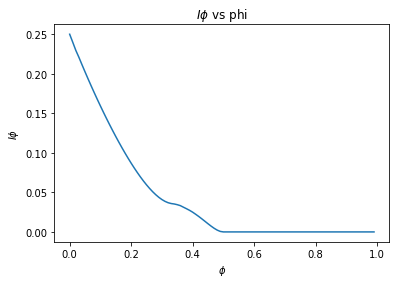

In [435]:

plt.plot(phival_list, I_list_forgraph)
plt.title("$I{\phi}$ vs phi")
plt.xlabel("$\phi$")
plt.ylabel("$I{\phi}$")
plt.show()

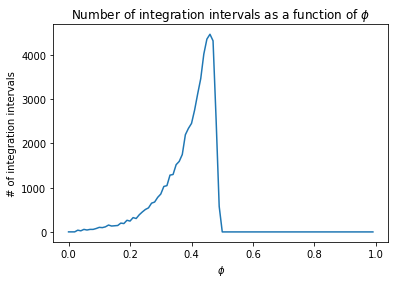

In [438]:
plt.plot(phival_list, interval_list_forgraph)
plt.title("Number of integration intervals as a function of $\phi$")
plt.xlabel("$\phi$")
plt.ylabel("# of integration intervals")
plt.show()

So we can see the range of $\phi$ values that require the most intervals is between 0.4 and 0.5. It drops off thereafter. 

## 4a)

To show that the order of accuracy for this method is 2, we begin with the truncation error:

$T_k \equiv \frac{y(t_{k+1}) - y(t_k)}{h} - f(t_{k + \frac{1}{2}}, \frac{y(t_{k}) + y(t_{k+1})}{2})$

and note that we are doing our Taylor expansions about the point $t_{k+\frac{1}{2}}$.


We'll Taylor expand each of the terms in the truncation error above.

So we begin with $y(t_{k+1})$, which we Taylor expand as follows:

$y_{k+1} = y(t_{k + 1}) = y(t_{k + \frac{1}{2}}) + \frac{h}{2}y'(t_{k + \frac{1}{2}}) + \frac{h^2}{(4)(2)}y''(t_{k + \frac{1}{2}}) + O(h^3)y''' ...$

We now move to $y(t_k)$. But note that where in the above case we were Taylor expanding from the midpoint in the "forward" direction (since we were looking for the $k+1$ case), below we are Taylor expanding from the midpoint in the "backward" direction (since we are looking for the $k$ case).

So we have:

$y_k = y(t_k) = y(t_{k + \frac{1}{2}}) - \frac{h}{2}y'(t_{k + \frac{1}{2}}) + \frac{h^2}{(4)(2)}y''(t_{k + \frac{1}{2}}) - O(h^3)y''' ...$

Based on these two, we can now evaluate the first term in the $T_k$ expression above:

$\frac{y(t_{k+1}) - y(t_k)}{h} = \frac{1}{h} (y(t_{k + \frac{1}{2}}) + \frac{h}{2}y'(t_{k + \frac{1}{2}}) + \frac{h^2}{(4)(2)}y''(t_{k + \frac{1}{2}}) + O(h^3)y''' ...) - \frac{1}{h}(y(t_{k + \frac{1}{2}}) - \frac{h}{2}y'(t_{k + \frac{1}{2}}) + \frac{h^2}{(4)(2)}y''(t_{k + \frac{1}{2}}) - O(h^3)y''' ...)$

The equal but opposite terms allow us to simplify this to become:

$\frac{y(t_{k+1}) - y(t_k)}{h} = \frac{1}{h}(hy'(t_{k + \frac{1}{2}}) + O(h^3)y''' ...)$

which in turn simplifies to:

$\frac{y(t_{k+1}) - y(t_k)}{h} = y'(t_{k + \frac{1}{2}}) + O(h^2)y''' ...$

We can therefore already see that the order of accuracy for this first term in $T_k$ is 2, which is positive news. 



Now, we turn to the second term in the $T_k$ expression:

$f(t_{k + \frac{1}{2}}, \frac{y(t_{k}) + y(t_{k+1})}{2})$.

Because we know $t_{k + \frac{1}{2}} = t_k + \frac{h}{2}$, we know that $t_k = t_{k + \frac{1}{2}} - \frac{h}{2}$, which is useful for our expansion about the point $t_{k + \frac{1}{2}}$. We can thus rewrite the term as:

$f(t_{k + \frac{1}{2}}, \frac{y(t_{k + \frac{1}{2}} - \frac{h}{2}) + y(t_{k + \frac{1}{2}} + \frac{h}{2})}{2})$

The second term here looks familiar (even more so if we look at the previous version of the whole term), and we can thus use what we wrote above to rewrite it for simplification as follows:

$\frac{1}{2} \left[y(t_{k + \frac{1}{2}}) - \frac{h}{2}y'(t_{k + \frac{1}{2}}) + \frac{h^2}{(4)(2)}y''(t_{k + \frac{1}{2}}) - O(h^3)y''' ...\right] + \frac{1}{2} \left[ y(t_{k + \frac{1}{2}}) + \frac{h}{2}y'(t_{k + \frac{1}{2}}) + \frac{h^2}{(4)(2)}y''(t_{k + \frac{1}{2}}) + O(h^3)y''' ... \right]$

$ = y(t_{k + \frac{1}{2}}) + \frac{h^2}{8}y''(t_{k + \frac{1}{2}})$

So we have:

$f(t_{k + \frac{1}{2}}, \space y(t_{k + \frac{1}{2}}) + \frac{h^2}{8}y''(t_{k + \frac{1}{2}}))$




We can rewrite this in the form of $f(t_k, y_k) + \delta f_t(t_k, y_k) + \epsilon f_y(t_k, y_k)$ where $\delta = 0$ and $\epsilon = \frac{h^2}{8}y''(t_{k + \frac{1}{2}})$. This is useful, since we know the Taylor expansion of $f(t_k + \delta, \space y(t_{k + \frac{1}{2}}) + \epsilon)$ is $f(t_k, y_k) + \delta f_t(t_k, y_k) + \epsilon f_y(t_k, y_k)$.

We can substitute the first term in this expression to produce $y'(t_{k + \frac{1}{2}}) + \delta f_t(t_{k + \frac{1}{2}}, y_{k + \frac{1}{2}}) + \epsilon f_y(t_{k + \frac{1}{2}}, y_{k + \frac{1}{2}}) $, and since $\delta = 0$, we have:

$y'(t_{k + \frac{1}{2}}) + \epsilon f_y(t_{k + \frac{1}{2}}, y_{k + \frac{1}{2}}) $

Because $y'(t) = f(t, y(t))$, we can see $y''(t) = f_t(t, y(t)) + f_y(t, y(t))y'(t)$.

So $f_y(t, y(t)) = \frac{y''(t) - f_t(t, y(t))}{y'(t)}$.

With this, we finally rewrite the Taylor approximation of the second term in $T_k$ as:

$ y'(t_{k + \frac{1}{2}}) + \epsilon \left[\frac{y''(t_{k + \frac{1}{2}}) - f_t(t_{k + \frac{1}{2}}, y(t_{k + \frac{1}{2}}))}{y'(t_{k + \frac{1}{2}})} \right]$




So we can now look at $T_k$ as a whole:

$T_k = \left[y'(t_{k + \frac{1}{2}}) + O(h^2)y''' ...\right] - \left[ y'(t_{k + \frac{1}{2}}) + \epsilon \left[\frac{y''(t_{k + \frac{1}{2}}) - f_t(t_{k + \frac{1}{2}}, y(t_{k + \frac{1}{2}}))}{y'(t_{k + \frac{1}{2}})} \right]\right]$

The $y'$ terms cancel, and this simplifies to:

$_Tk = O(h^2)y''' - \epsilon \left[\frac{y''(t_{k + \frac{1}{2}}) - f_t(t_{k + \frac{1}{2}}, y(t_{k + \frac{1}{2}}))}{y'(t_{k + \frac{1}{2}})} \right]$

If we rewrite with $\epsilon$ expanded, we have:

$T_k = O(h^2)y''' - \frac{h^2}{8}y''(t_{k + \frac{1}{2}}) \left[\frac{y''(t_{k + \frac{1}{2}}) - f_t(t_{k + \frac{1}{2}}, y(t_{k + \frac{1}{2}}))}{y'(t_{k + \frac{1}{2}})} \right]$






Since the two terms in $T_k$ are both $O(h^2)$ terms (but are not equal to each other), we can conclude:

$T_k = O(h^2)$

Thus, we see that the order of accuracy for the midpoint method is indeed 2. 

## 4b)

To find the values of $\bar{h} = \lambda y$ for which the method is stable, we hunt for the stability region for the equation $y' = \lambda y$. We can think of the term on the LHS as a sort of a $\lambda$ 'projection' (or scaling factor) of the midpoint (represented by $y$ on the RHS). 

We thus rewrite $y' = \lambda y$ as:

$\frac{y_{k+1} - y_k}{h} = \lambda \frac{y_{k+1} - y_k}{2}$


Rearranging this produces:

$y_{k+1} = \frac{1 + \frac{\lambda h}{2}}{1 - \frac{\lambda h}{2}} y_k $

So to prevent this exploding, we have the constraint on magnitude:

$\left|\frac{1 + \frac{\lambda h}{2}}{1 - \frac{\lambda h}{2}}\right| \leq 1 $

Since $\bar{h} = \lambda y$, we can rewrite the above equation as:

$\left|\frac{1 + \frac{\bar{h}}{2}}{1 - \frac{\bar{h}}{2}}\right| \leq 1 $

Multiply the left side by $\frac{2}{2}$ to get:

$\left|\frac{2 + \bar{h}}{2 - \bar{h}}\right| \leq 1 $

We reorder this and rewrite it substituting $\bar{h}$ for a complex form $\bar{h} = a + ib$:

$\left| 2 + a + ib \right| \leq \left|2 - a - ib \right|$





We can now reason using magnitudes of complex numbers:

$(2+a)^2 + b^2 \leq (2-a)^2 + b^2$

This simplifies to $a \leq -a$, which in turn produces:

$a \leq 0$.

So we have our answer: This method is stable where the real part of $\bar h$ is less than or equal to 0.



## 6a)

Writing the system of ODEs in terms of $x$, $y$, $u$, and $v$ results in:

$x' = -\frac{1}{2}(-2u)$

$x' = u$

$y' = -\frac{1}{2}(-2v)$

$y' = v$

$u' = v + \frac{1}{2}(-\frac{2(1-\mu)x}{(x^2+y^2)^{3/2}} - \frac{2\mu(x-1)}{((x-1)^2+y^2)^{\frac{3}{2}}} + 2(x-\mu)$

$u' = v - \frac{(1-\mu)x}{(x^2+y^2)^{3/2}} - \frac{\mu(x-1)}{((x-1)^2+y^2)^{\frac{3}{2}}} + (x-\mu)$

Similar to $u'$, we have $v'$:

$v' = -u - \frac{(1-\mu)y}{(x^2+y^2)^{3/2}} - \frac{\mu y}{((x-1)^2+y^2)^{\frac{3}{2}}} + y$

So rewriting the various equations more cleanly as a system of ODEs restults in:

$x' = u$

$y' = v$

$u' = v - \frac{(1-\mu)x}{(x^2+y^2)^{3/2}} - \frac{\mu(x-1)}{((x-1)^2+y^2)^{\frac{3}{2}}} + (x-\mu)$

$v' = -u - \frac{(1-\mu)y}{(x^2+y^2)^{3/2}} - \frac{\mu y}{((x-1)^2+y^2)^{\frac{3}{2}}} + y$

Using the above , we define a function that accepts x, y, v, and u, and outputs the desired derivative equations. 

In [140]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def asteroid_eqns(xyuv_vec, t, mu):
    x, y, u, v = xyuv_vec
    xprime = u
    yprime = v
    uprime = v + (x-mu) - (1-mu)*x/((x**2 + y**2)**(3/2)) - mu*(x-1)/(((x-1)**2 + y**2)**(3/2))
    vprime = -u + y - (1 - mu)*y/((x**2 + y**2)**(3/2)) - mu*y/(((x-1)**2 + y**2)**(3/2))
    
    return [xprime, yprime, uprime, vprime]


## 6b)

To write a program that determines whether a line segment from $\textbf{x}_0 = (x_0, y_0)$ to $\textbf{x}_1 = (x_1, y_1)$ intersects a circle of radius $R$ centered at $(0,0)$, we consider how we would write the line segment in parametric terms:

$\textbf{x} = tx_0 + (1-t)x_1$

$\textbf{y} = ty_0 + (1-t)y_1$

So we want to figure out whether this line will intersect (collide) with the circle. The question becomes: for what viable $t$ do we have $R^2 = \textbf{x}^2 + \textbf{y}^2$?

To figure out, we write

$R^2 = \textbf{x}^2 + \textbf{y}^2$

and expand to 

$R^2 = (tx_0 + (1-t)x_1)^2 + (ty_0 + (1-t)y_1)^2$. 

The $t$ value will only be meaningful (because it must represent a real-world time) if it is not negative, and for our purposes should be between 0 and 1. 

The code below provides a program which does this:

In [225]:
    
def collisioncourse(x_0, y_0, x_1, y_1, R):
    r = R
    a = x_0**2 - 2*x_0*x_1 + x_1**2 + y_0**2 - 2*y_0*y_1 + y_1**2
    b = 2*x_0*x_1 + 2*y_0*y_1 - 2*x_1**2 - 2*y_1**2
    c = x_1**2 + y_1**2 - r**2
    if b**2 - 4*a*c < 0:
        return False
    t_minus = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    t_plus = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    if 0 <= t_minus <= 1:
        return True
    elif 0 <= t_plus <=1:
        return True
    else:
        return False


## 6c)

See below for the code and the output: 10 asteroid trajectories plotted in relation to Earth and the moon. 

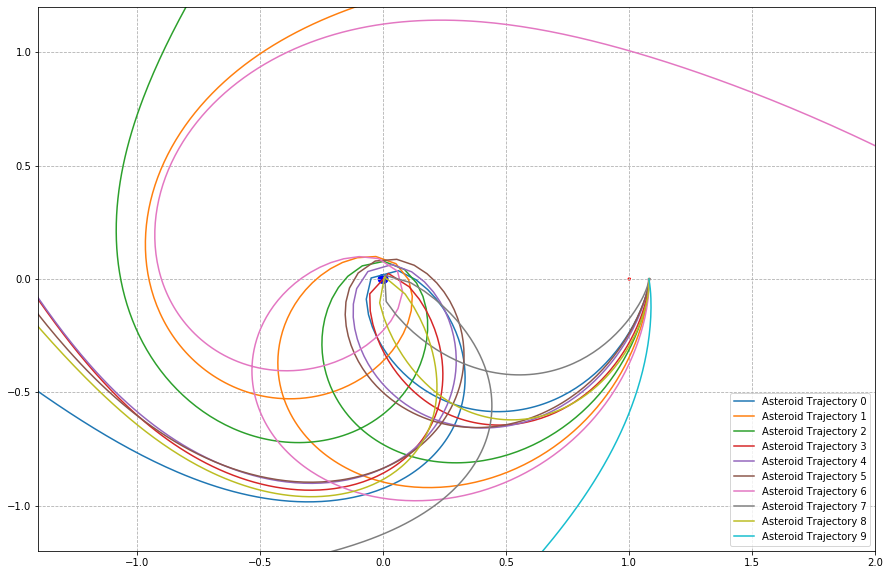

In [242]:

fig, ax = plt.subplots(figsize=(15, 10))

t = np.linspace(0, 10, 500)
mu = 0.01

for i in range(10):
    
    Ex0 = np.random.normal(0, 0.002)
    Ey0 = np.random.normal(0, 0.002)
    x_0 = 1.0798 + Ex0
    y_0 = 0 + Ey0

    Exf = np.random.normal(0, 0.002)
    Eyf = np.random.normal(0, 0.002)
    x_f = 1.0802 + Exf
    y_f = -0.0189 + Eyf

    velx_0 = (x_f - x_0)/(0.02)
    vely_0 = (y_f - y_0)/(0.02)
    
    x = x_0
    y = y_0
    u = velx_0
    v = vely_0
    
    target = odeint(asteroid_eqns, [x, y, u, v], t, args=(mu,))
    x_x = target[:,0]
    x_y = target[:,1]
    
    iterationlabel = "Asteroid Trajectory " + str(i)
    ax.plot(x_x, x_y, label=iterationlabel)



earth = plt.Circle((0, 0), 0.02, color='b')
moon = plt.Circle((1, 0), 0.005, color='r')

ax.add_artist(earth)
ax.add_artist(moon)

ax.axis(xmin=-1.4, xmax=2, ymin=-1.2, ymax=1.2)
ax.grid(linestyle='--')
ax.legend()
plt.show()



## 6d)

We now simulate 2,500 trajectories, determining for each trajectory whether it first collides with the Moon, Earth, or doesn't collide with either. 

The code also outputs one of the trajectories that collides with the Earth, and one that collides with the Moon. 


The probability an asteroid hits Earth is 0.2488
The probability an asteroid hits the Moon is 0.0016
The probability an asteroid hits neither celestial body is 0.7496


Below is a plot of one asteroid trajectory that collides with Earth,
and one asteroid trajectory that collides with the Moon


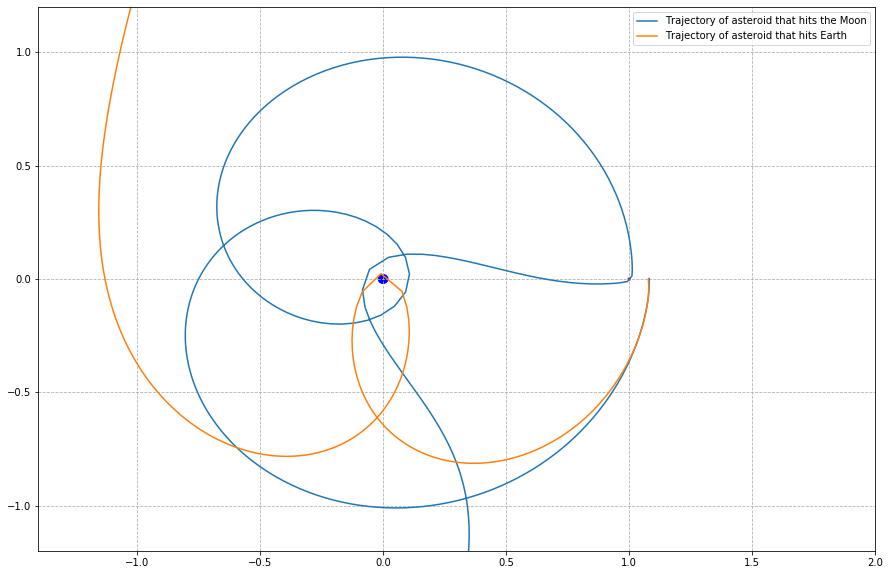

In [229]:

t = np.linspace(0, 10, 500)
mu = 0.01

num_asteroids = 2500

Earth_hits = 0
Moon_hits = 0

for i in range(num_asteroids):
    
    Ex0 = np.random.normal(0, 0.002)
    Ey0 = np.random.normal(0, 0.002)
    x_0 = 1.0798 + Ex0
    y_0 = 0 + Ey0

    Exf = np.random.normal(0, 0.002)
    Eyf = np.random.normal(0, 0.002)
    x_f = 1.0802 + Exf
    y_f = -0.0189 + Eyf

    velx_0 = (x_f - x_0)/(0.02)
    vely_0 = (y_f - y_0)/(0.02)
    
    x = x_0
    y = y_0
    u = velx_0
    v = vely_0
    
    target = odeint(asteroid_eqns, [x, y, u, v], t, args=(mu,))
    x_x = target[:,0]
    x_y = target[:,1]
    
    for k in range(len(x_x)-1):
        #to see if asteroid hits Earth, and count hits:
        if collisioncourse(x_x[k], x_y[k], x_x[k+1], x_y[k+1], R=0.02):
            Earth_hits += 1
            earth_graph_x = x_x
            earth_graph_y = x_y
            
        #to see if asteroid hits Moon, and count hits:
        if collisioncourse(x_x[k]-1, x_y[k], x_x[k+1]-1, x_y[k+1], R=0.005):
            Moon_hits += 1
            moon_graph_x = x_x
            moon_graph_y = x_y



prob_Earthhit = Earth_hits/num_asteroids
prob_Moonhit = Moon_hits/num_asteroids
prob_nohit = 1 - (prob_Moonhit + prob_Earthhit)

print("The probability an asteroid hits Earth is", prob_Earthhit)
print("The probability an asteroid hits the Moon is", prob_Moonhit)
print("The probability an asteroid hits neither celestial body is", prob_nohit)



print("\n")
print("Below is a plot of one asteroid trajectory that collides with Earth,")
print("and one asteroid trajectory that collides with the Moon")

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(moon_graph_x, moon_graph_y, label="Trajectory of asteroid that hits the Moon")
ax.plot(earth_graph_x, earth_graph_y, label="Trajectory of asteroid that hits Earth")

earth = plt.Circle((0, 0), 0.02, color='b')
moon = plt.Circle((1, 0), 0.005, color='r')

ax.add_artist(earth)
ax.add_artist(moon)

ax.axis(xmin=-1.4, xmax=2, ymin=-1.2, ymax=1.2)
ax.grid(linestyle='--')
ax.legend()
plt.show()



So we have that the probability an asteroid will collide with the Earth is ~25%, the probability it hits the moon is <1%, and the probability it collides with neither is ~75%. 

Note that because the trajectories include random noise in their generation, these probabilities are not the exact same on each run of the above code, but they generally produce probabilities similar to these. 

